In [129]:
%run setup.ipynb
%matplotlib inline
import hapclust
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np

cartopy 0.15.1


In [130]:
#grab these from ag1000g - no need to bring in the meta data file
df_lonlat = pd.DataFrame()
df_lonlat['pop'] = ['AOM', 'BFM', 'BFS', 'CMS', 'GAS', 'GNS', 'GWA', 'KES', 'UGS']
df_lonlat['longitude'] = [13.291000, -4.413900, -4.413900, 13.936844, 9.455000, -9.675065, -15.582000, 39.824614, 34.026000]
df_lonlat['latitude'] = [-8.821000, 11.206500,11.206500, 4.937851, 0.384000, 8.887097, 11.891000, -3.702068, 0.770000]
df_lonlat = df_lonlat.set_index('pop')

In [131]:
#check
df_lonlat.loc['AOM']

longitude    13.291
latitude     -8.821
Name: AOM, dtype: float64

In [132]:
#check
for country, row in df_lonlat.iterrows():
    print(country, row.latitude, row.longitude)

AOM -8.821 13.291
BFM 11.2065 -4.4139
BFS 11.2065 -4.4139
CMS 4.937851 13.936844
GAS 0.384 9.455
GNS 8.887097 -9.675065
GWA 11.891 -15.582
KES -3.702068 39.824614
UGS 0.77 34.026


In [133]:
crs_lonlat = ccrs.PlateCarree()

In [134]:
ratios=np.asarray([0.5, 0.5])

In [135]:
sum(ratios)

1.0

## what we need to get the haplogroup map sorted!

- We got the indices/collection sites of the indv in each haplogroup to make the networks
- we just need to know:
    - how many haplotypes at each site
    - what proportion belong to each of the 10 haplogroups (colours from figure 2)
    - what proportion are 'non haplogroup'



In [138]:
#setup data - pinched from hapclust_demo
callset = h5py.File('../data/ag1000g.phase1.AR3.1.haplotypes.specific_regions.2L_2358158_2431617.h5',
                    mode='r')
region_vgsc = SeqFeature('2L', 2358158, 2431617)
genotypes = allel.GenotypeArray(callset['2L/calldata/genotype'])
haplotypes = genotypes.to_haplotypes()
pos = allel.SortedIndex(callset['2L/variants/POS'])
loc = pos.locate_range(region_vgsc.start, region_vgsc.end)
h_vgsc = haplotypes[loc]
pos_995S = 2422651
pos_995F = 2422652
loc_995S = haplotypes[pos.locate_key(pos_995S)] == 1
loc_995F = haplotypes[pos.locate_key(pos_995F)] == 1
h_vgsc_995F = h_vgsc.compress(loc_995F, axis=1)
h_vgsc_995S = h_vgsc.compress(loc_995S, axis=1)
sample_ids = callset['2L']['samples'][:]
hap_ids = np.array(list(itertools.chain(*[[s + b'a', s + b'b'] for s in sample_ids])))
hap_ids_995F = hap_ids[loc_995F]
hap_ids_995S = hap_ids[loc_995S]
tbl_haplotypes = etl.fromtsv('../data/ag1000g.phase1.AR3.1.haplotypes.meta.txt')
hap_pops = np.array(tbl_haplotypes.values('population'))
hap_pops_995S = hap_pops[loc_995S]
hap_pops_995F = hap_pops[loc_995F]
# need to use named colors for graphviz
pop_colors = {
    'AOM': 'brown',
    'BFM': 'firebrick1',
    'GWA': 'goldenrod1',
    'GNS': 'cadetblue1',
    'BFS': 'deepskyblue',
    'CMS': 'dodgerblue3',
    'UGS': 'palegreen',
    'GAS': 'olivedrab',
    'KES': 'grey47',
    'colony': 'black'
}
#associates pop colours with haps
hap_colors = np.array([pop_colors[p] for p in hap_pops])
hap_colors_995S = np.array([pop_colors[p] for p in hap_pops_995S])
hap_colors_995F = np.array([pop_colors[p] for p in hap_pops_995F])

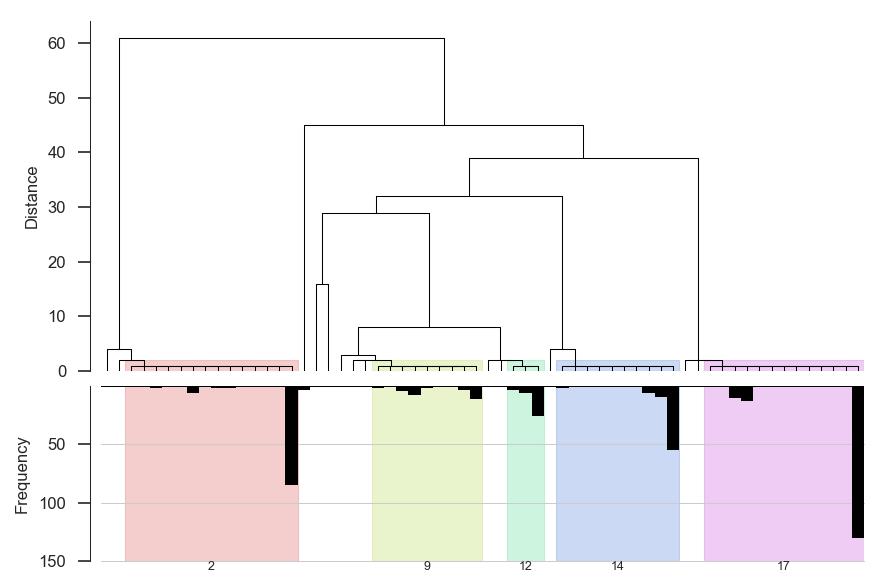

In [139]:
#use the dendro cutting to get the pop freqs for each of the S and F clusters
cut_height = 2
_, _, _, cluster_spans_995S, leaf_obs_995S = hapclust.fig_haplotypes_clustered(h_vgsc_995S, cut_height=cut_height, dpi=150, 
                                                                               highlight_clusters=5, label_clusters=5)

In [140]:
#indices of haplotypes, relative to the hap_pops_995S array - use this to get freqs of each pop
cluster_spans_995S[17][2]

array([  2,   6,   8,   9,  10,  12,  13,  14,  18,  20,  22,  24,  26,
        27,  30,  31,  32,  34,  44,  46,  48,  49,  52,  53,  54,  56,
        58,  60,  62,  66,  67,  68,  69,  70,  72,  74,  76,  78,  80,
        81,  84,  90,  92,  93,  96,  97,  98,  99, 102, 104, 105, 106,
       108, 110, 112, 116, 117, 118, 120, 124, 125, 130, 132, 134, 136,
       138, 142, 143, 146, 150, 152, 153, 154, 155, 156, 160, 161, 162,
       166, 168, 170, 174, 175, 178, 179, 180, 182, 190, 191, 192, 194,
       196, 198, 200, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272])

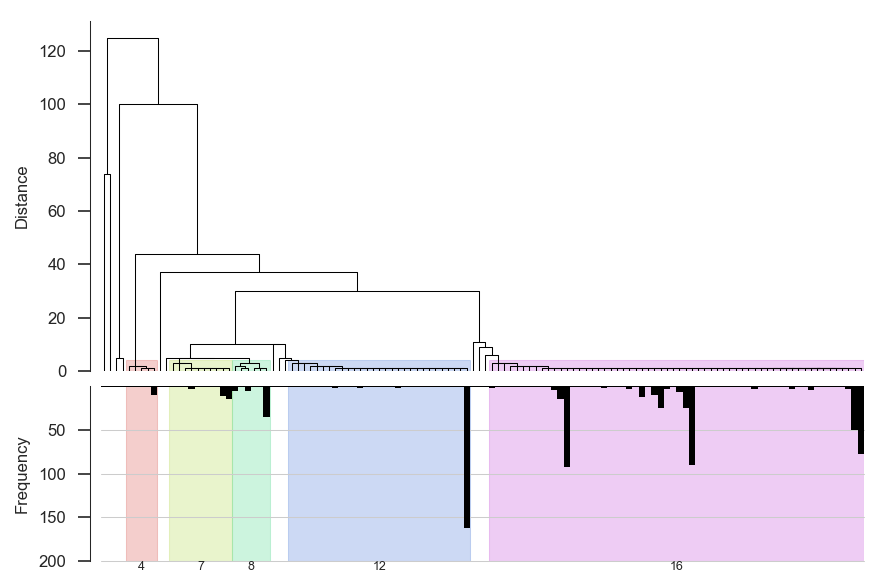

In [141]:
#and for F
cut_height = 4
_, _, _, cluster_spans_995F, leaf_obs_995F = hapclust.fig_haplotypes_clustered(h_vgsc_995F, cut_height=cut_height, dpi=150,
                                                                               highlight_clusters=5, label_clusters=5)

## haplogroup frequencies across populations

In [142]:
# we need to know the total number of haplotypes at each site to sort out pie chart size and proportions
unique, counts = np.unique(hap_pops, return_counts=True)
for u, c in zip(unique, counts):
    print(u, c)
print("total =",sum(counts), ".   total - colony =", sum(counts)-16)

AOM 120
BFM 138
BFS 162
CMS 550
GAS 112
GNS 62
GWA 92
KES 88
UGS 206
colony 16
total = 1546 .   total - colony = 1530


In [143]:
sclu = [17, 14, 12, 9, 2]
fclu = [16, 12, 8, 7, 4]
pclu = list(np.unique(hap_pops))

In [144]:
#COUNT HAPS - make lists (columns) for each cluster so that we can turn these into a df 

def pop_count(hap_pops_type, cluster_spans, clust_list):
    
    #first set up empty array with 0s
    arr = np.zeros([10,5], dtype=int)
    
    #then loop through haplogroup clusters
    for cov in clust_list:
        cov_ind = hap_pops_type.take(cluster_spans[cov][2])
        unique, counts = np.unique(cov_ind, return_counts=True)
        clus_index = clust_list.index(cov)
        #then loop through populations present in that haplogroup cluster
        for u, c in zip(unique, counts):
            pop_index = pclu.index(u)
            arr[pop_index, clus_index] = c
            #print(clus_index,cov, u, pop_index, c)

    return arr

In [145]:
sarr = pop_count(hap_pops_995S, cluster_spans_995S, sclu)
farr = pop_count(hap_pops_995F, cluster_spans_995F, fclu)

In [146]:
#make df
hap_freq_df = pd.DataFrame()
hap_freq_df['pops'] = pclu
hap_freq_df.set_index('pops', inplace=True)
hap_freq_df['F16'] = farr[:,0]
hap_freq_df['F12'] = farr[:,1]
hap_freq_df['F8'] = farr[:,2]
hap_freq_df['F7'] = farr[:,3]
hap_freq_df['F4'] = farr[:,4]
hap_freq_df['S17'] = sarr[:,0]
hap_freq_df['S14'] = sarr[:,1]
hap_freq_df['S12'] = sarr[:,2]
hap_freq_df['S9'] = sarr[:,3]
hap_freq_df['S2'] = sarr[:,4]
hap_freq_df['wildtype'] = counts - list(hap_freq_df.sum(axis=1))
hap_freq_df['total'] = counts
hap_freq_df

,F16,F12,F8,F7,F4,S17,S14,S12,S9,S2,wildtype,total
pops,,,,,,,,,,,,
AOM,97,0,0,0,0,0,0,0,0,0,23,120
BFM,117,0,0,0,0,0,0,0,0,0,21,138
BFS,162,0,0,0,0,0,0,0,0,0,0,162
CMS,32,169,50,20,14,0,8,35,33,0,189,550
GAS,0,24,0,16,0,0,70,0,0,0,2,112
GNS,62,0,0,0,0,0,0,0,0,0,0,62
GWA,0,0,0,0,0,0,0,0,0,0,92,92
KES,0,0,0,0,0,66,0,0,0,0,22,88
UGS,0,0,0,0,0,97,0,0,0,106,3,206


## build pies - use colours from original dendrogram

In [147]:
#from df make 11 slice pie chart proportions (total = 1) for each country
#we need pie colours

In [148]:
highlight_colors = sns.color_palette('hls', n_colors=10)
#add a final colour for wt - see what this looks like
highlight_colors.append((0.0, 0.0, 0.0))
#check
highlight_colors

[(0.85999999999999999, 0.37119999999999997, 0.33999999999999997),
 (0.85999999999999999, 0.68320000000000003, 0.33999999999999997),
 (0.72479999999999989, 0.85999999999999999, 0.33999999999999997),
 (0.41279999999999994, 0.85999999999999999, 0.33999999999999997),
 (0.33999999999999997, 0.85999999999999999, 0.57920000000000016),
 (0.33999999999999997, 0.82879999999999987, 0.85999999999999999),
 (0.33999999999999997, 0.51679999999999948, 0.85999999999999999),
 (0.47520000000000029, 0.33999999999999997, 0.85999999999999999),
 (0.7871999999999999, 0.33999999999999997, 0.85999999999999999),
 (0.85999999999999999, 0.33999999999999997, 0.62079999999999991),
 (0.0, 0.0, 0.0)]

In [149]:
df_lonlat

,longitude,latitude
pop,,
AOM,13.291000,-8.821000
BFM,-4.413900,11.206500
BFS,-4.413900,11.206500
CMS,13.936844,4.937851
GAS,9.455000,0.384000
GNS,-9.675065,8.887097
GWA,-15.582000,11.891000
KES,39.824614,-3.702068
UGS,34.026000,0.770000


# use matplotlib pie

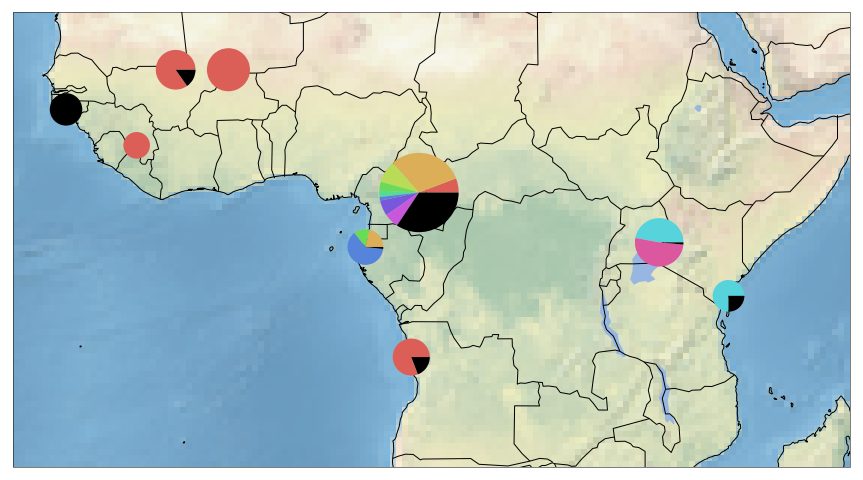

In [269]:
extent_lonlat = (-20, 50, -18, 20)

subplot_kw = dict(projection=crs_lonlat)
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=subplot_kw)
ax.coastlines(resolution='50m', linewidth=.2, zorder=1)
ax.stock_img()
ax.add_feature(cfeature.BORDERS, lw=.5, zorder=4)
ax.add_feature(cfeature.LAKES)
#ax.margins(0)


for pop, row in df_lonlat.iterrows():
    #ax.add_patch(plt.Circle((row.longitude, row.latitude), radius=5, color='k'))
    freqs = hap_freq_df.loc[pop]
    ratios = np.asarray([freqs[i]/freqs[11] for i in range(11)])
    #wedgeprops is used here just to pass the zorder command
    ax.pie(ratios, wedgeprops=dict(zorder=5),  colors=highlight_colors, center=(row.longitude, row.latitude), radius=np.sqrt(hap_freq_df.loc[pop][11] * .02))

ax.set_extent(extent_lonlat, crs=crs_lonlat)

    
# TO DO - fix two burkina faso pops - add legend 

### make both BF pies visible - with lines to single origin?

In [272]:
#wiggle BFM and BFS lom/lat about so we can see both
df_lonlat = pd.DataFrame()
df_lonlat['pop'] = ['AOM', 'BFM', 'BFS', 'CMS', 'GAS', 'GNS', 'GWA', 'KES', 'UGS']
df_lonlat['longitude'] = [13.291000, -6.413900, -2, 13.936844, 9.455000, -9.675065, -15.582000, 39.824614, 34.026000]
df_lonlat['latitude'] = [-8.821000, 15.206500, 15.206500, 4.937851, 0.384000, 8.887097, 11.891000, -3.702068, 0.770000]
df_lonlat = df_lonlat.set_index('pop')
df_lonlat

,longitude,latitude
pop,,
AOM,13.291000,-8.821000
BFM,-6.413900,15.206500
BFS,-2.000000,15.206500
CMS,13.936844,4.937851
GAS,9.455000,0.384000
GNS,-9.675065,8.887097
GWA,-15.582000,11.891000
KES,39.824614,-3.702068
UGS,34.026000,0.770000


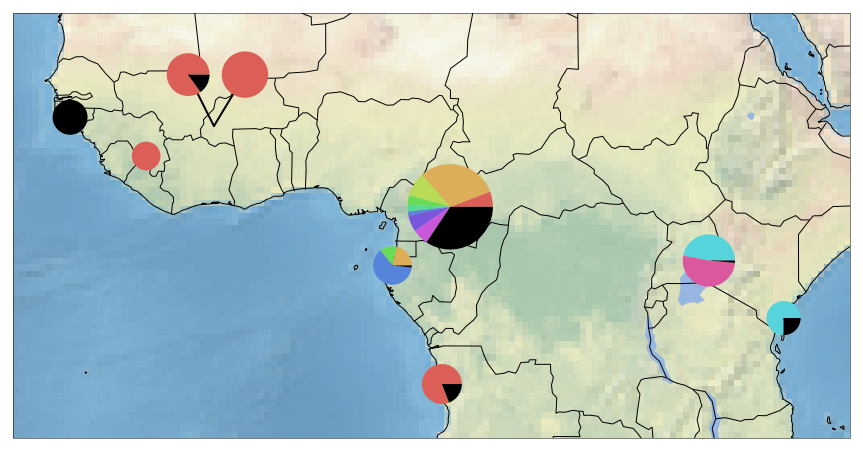

In [273]:
extent_lonlat = (-20, 45, -13, 20)

subplot_kw = dict(projection=crs_lonlat)
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=subplot_kw)
ax.coastlines(resolution='50m', linewidth=.2, zorder=1)
ax.stock_img()
ax.add_feature(cfeature.BORDERS, lw=.1, zorder=4)
ax.add_feature(cfeature.LAKES)
#ax.margins(0)


for pop, row in df_lonlat.iterrows():
    #ax.add_patch(plt.Circle((row.longitude, row.latitude), radius=5, color='k'))
    freqs = hap_freq_df.loc[pop]
    ratios = np.asarray([freqs[i]/freqs[11] for i in range(11)])
    #wedgeprops is used here just to pass the zorder command
    ax.pie(ratios, wedgeprops=dict(zorder=5),  colors=highlight_colors, center=(row.longitude, row.latitude), radius=np.sqrt(hap_freq_df.loc[pop][11] * .02))
    
    

ax.set_extent(extent_lonlat, crs=crs_lonlat)
#add lines to BF orgin lonlat
ax.plot([-4.413900, -6.413900], [11.206500, 15.206500], 'k-', linewidth=2)
ax.plot([-4.413900, -2], [11.206500, 15.206500], 'k-', linewidth=2);
#ax.add_patch(plt.Circle((-4.413900, 11.206500), radius=1, color='k'))   
# TO DO  - add legend 

### add legend

In [274]:
highlight_colors

[(0.85999999999999999, 0.37119999999999997, 0.33999999999999997),
 (0.85999999999999999, 0.68320000000000003, 0.33999999999999997),
 (0.72479999999999989, 0.85999999999999999, 0.33999999999999997),
 (0.41279999999999994, 0.85999999999999999, 0.33999999999999997),
 (0.33999999999999997, 0.85999999999999999, 0.57920000000000016),
 (0.33999999999999997, 0.82879999999999987, 0.85999999999999999),
 (0.33999999999999997, 0.51679999999999948, 0.85999999999999999),
 (0.47520000000000029, 0.33999999999999997, 0.85999999999999999),
 (0.7871999999999999, 0.33999999999999997, 0.85999999999999999),
 (0.85999999999999999, 0.33999999999999997, 0.62079999999999991),
 (0.0, 0.0, 0.0)]

In [275]:
kdr_colors = {
    'F2': highlight_colors[0],
    'F4': highlight_colors[1],
    'F3': highlight_colors[2],
    'F5': highlight_colors[3],
    'F1': highlight_colors[4],
    'S3': highlight_colors[5],
    'S4': highlight_colors[6],
    'S5': highlight_colors[7],
    'S2': highlight_colors[8],
    'S1': highlight_colors[9],
    'wt': highlight_colors[10]
}

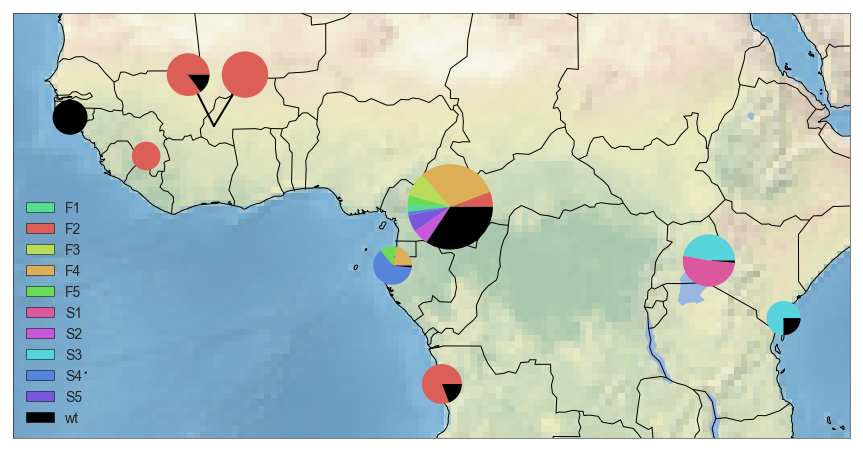

In [282]:
extent_lonlat = (-20, 45, -13, 20)

subplot_kw = dict(projection=crs_lonlat)
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=subplot_kw)
ax.coastlines(resolution='50m', linewidth=.2, zorder=1)
ax.stock_img()
ax.add_feature(cfeature.BORDERS, lw=.1, zorder=4)
ax.add_feature(cfeature.LAKES)
#ax.margins(0)


for pop, row in df_lonlat.iterrows():
    #ax.add_patch(plt.Circle((row.longitude, row.latitude), radius=5, color='k'))
    freqs = hap_freq_df.loc[pop]
    ratios = np.asarray([freqs[i]/freqs[11] for i in range(11)])
    #wedgeprops is used here just to pass the zorder command
    ax.pie(ratios, wedgeprops=dict(zorder=5),  colors=highlight_colors, center=(row.longitude, row.latitude), radius=np.sqrt(hap_freq_df.loc[pop][11] * .02))
    
    

ax.set_extent(extent_lonlat, crs=crs_lonlat)
#add lines to BF orgin lonlat
ax.plot([-4.413900, -6.413900], [11.206500, 15.206500], 'k-', linewidth=2)
ax.plot([-4.413900, -2], [11.206500, 15.206500], 'k-', linewidth=2)

handles = [mpl.patches.Patch(facecolor=v, edgecolor='k', label=k) for k, v in sorted(kdr_colors.items())]
ax.legend(handles=handles, loc='lower left', prop={'size':14});
#ax.add_patch(plt.Circle((-4.413900, 11.206500), radius=1, color='k'))   
# TO DO  - add legend 